In [71]:
import matplotlib.pyplot as plt
import os
import json

In [17]:
CUR_PATH = os.getcwd()

EXPERIMENT_NUM = 5
FILE_NAME = 'test_%d_json' % EXPERIMENT_NUM

def get_all_histories():
    return 'histories_20200326232648.json'

def get_encoded():
    return 'encoded_titanic_dnn_keras_tuner.json'

def get_scaled():
    return 'scaled_titanic_dnn_keras_tuner.json'

def get_reducted(n):  # 2~ 9
    return 'reducted_%d_titanic_dnn_keras_tuner.json' % n

def get_selected(n):  # 3~ 9
    return 'selected_%d_titanic_dnn_keras_tuner.json' % n

def get_selectedandreducted(selected_n, reducted_n):  # 9(8 ~ 2), 8(7 ~ 2), 7(6 ~ 2), 6(5 ~ 2), 5(4 ~ 2), 4(3 ~ 2), 3(2)
    return 'selected_%d_reducted_%d_titanic_dnn_keras_tuner.json' % (selected_n, reducted_n)

In [52]:
def plot_history(histories):
    
    histories_index = tuple(range(len(histories)))
    colors = ['r', 'g', 'b']
    
    figsize = (19.2, 6.4)
    
    for key in ['loss', 'val_loss', 'accuracy', 'val_accuracy']:
        plt.figure(figsize=figsize)
        for i, history, color in zip(histories_index, histories, colors):
            fmt = '%s' % color
            value = history[key]
            plt.plot(value, fmt, label=str(i))
        if key in ('accuracy', 'val_accuracy'):
            plt.ylim([0.85, 1])
        plt.grid()
        plt.legend()
        plt.title(key)

In [56]:
def plot_multi_histories(get_func, min, max, k=0):
    
    colors = ['k', 'r', 'g', 'b', 'y', 'c', 'm', 'silver', 'peru', 'pink']
    figsize = (19.2, 6.4)
    
    operation = get_func.__name__.split('_')[1]
    
    plt.figure(figsize=figsize)
    for i in list(range(min, max + 1)):
        
        if not k:
            FILE_PATH = os.path.join(CUR_PATH, FILE_NAME, get_func(i))
        else:
            FILE_PATH = os.path.join(CUR_PATH, FILE_NAME, get_func(k, i))
        with open(FILE_PATH, 'r') as f:
            results = json.load(f)
        
        histories = tuple(json.loads(model_test_result['history'].replace('\'', '"')) for model_test_result in results['model_test_results'])
        val_fmt = '%s' % colors[i]
        val_accuracy = histories[0]['val_accuracy']
        plt.plot(val_accuracy, val_fmt, label='%s %d' % (operation, i))
    plt.ylim([0.85, 1])
    plt.grid()
    plt.legend()
    plt.title('val_accuracy')

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

Text(0.5, 1.0, 'all_histories')

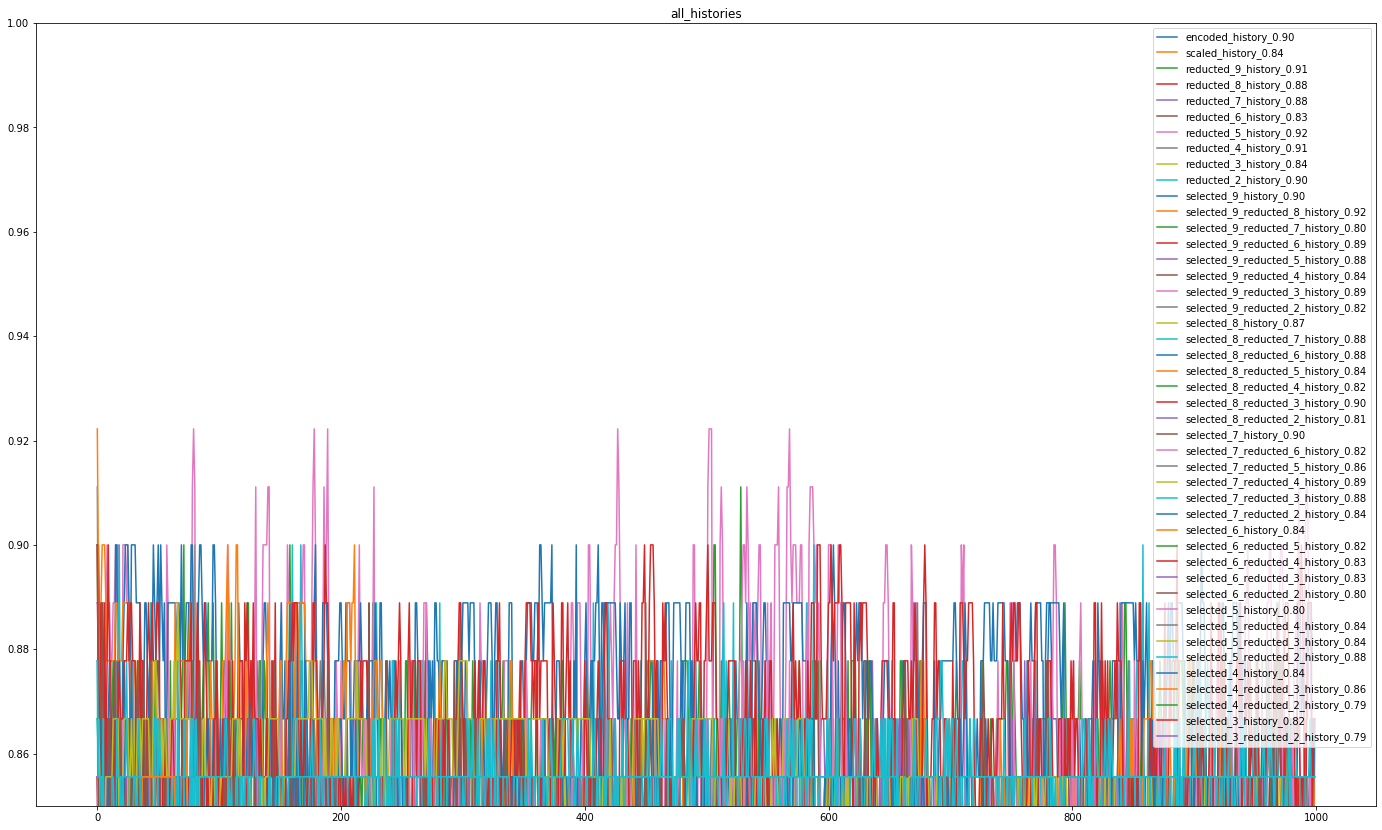

In [74]:
# 查看所有history
HISTORIES_PATH = os.path.join(CUR_PATH, FILE_NAME, get_all_histories())
with open(HISTORIES_PATH, 'r') as f:
    histories = json.load(f)

histories.keys()
plt.figure(figsize=(24, 14.4))
for name, history in histories.items():
    history = history.replace('\'', '"')
    history = json.loads(history)
    val_accuracy = history['val_accuracy']
    plt.plot(val_accuracy, label='%s_%.2f' % (name, max(val_accuracy)))
plt.ylim([0.85, 1])
plt.legend()
plt.title('all_histories')

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

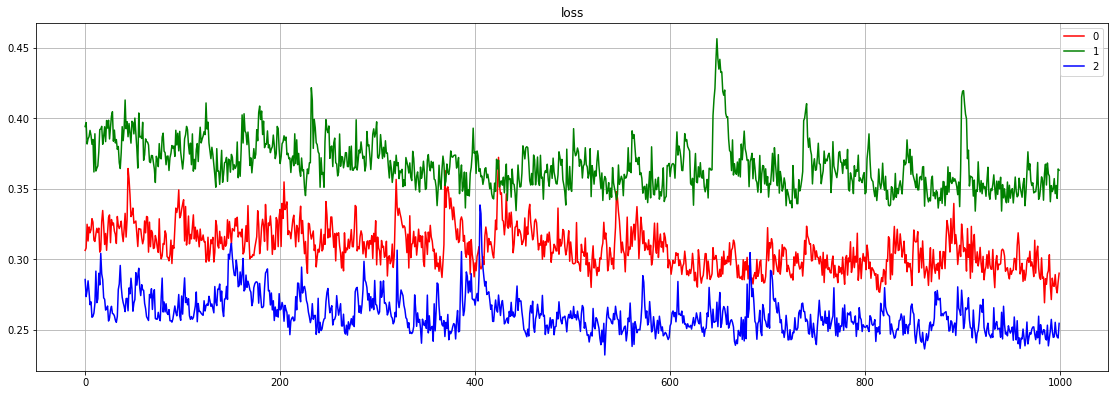

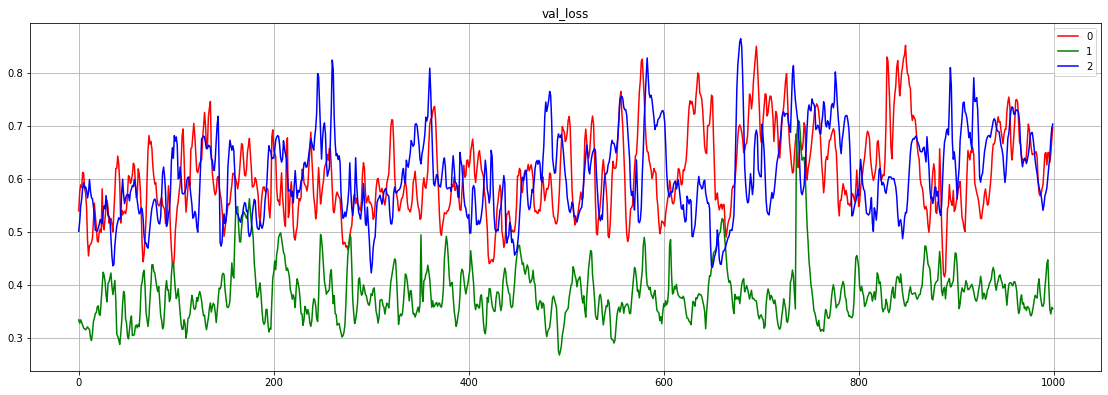

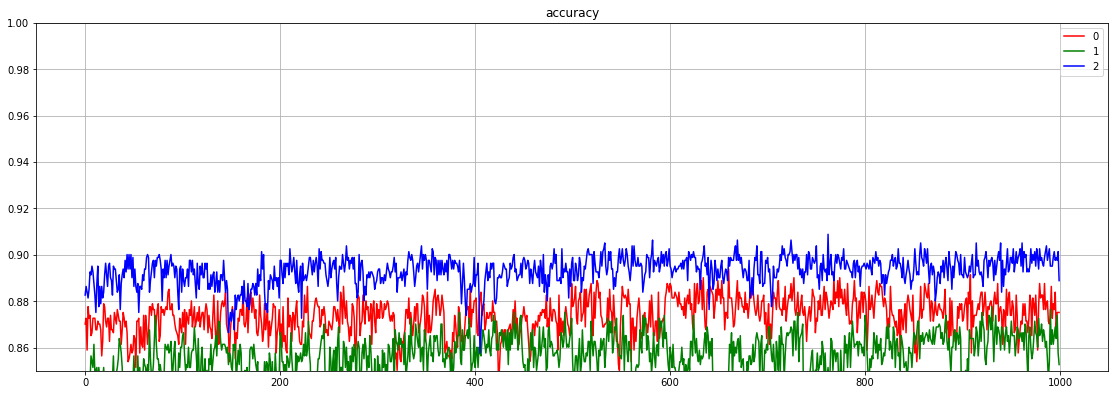

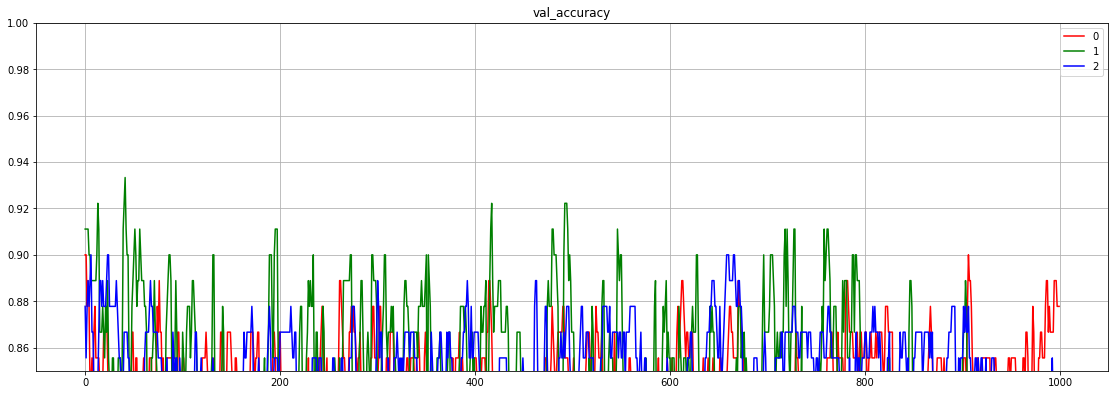

In [53]:
# 数值编码结果
ENCODED_PATH = os.path.join(CUR_PATH, FILE_NAME, get_encoded())
with open(ENCODED_PATH, 'r') as f:
    results = json.load(f)

encoded_histories = tuple(json.loads(model_test_result['history'].replace('\'', '"')) for model_test_result in results['model_test_results'])
plot_history(encoded_histories)


In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

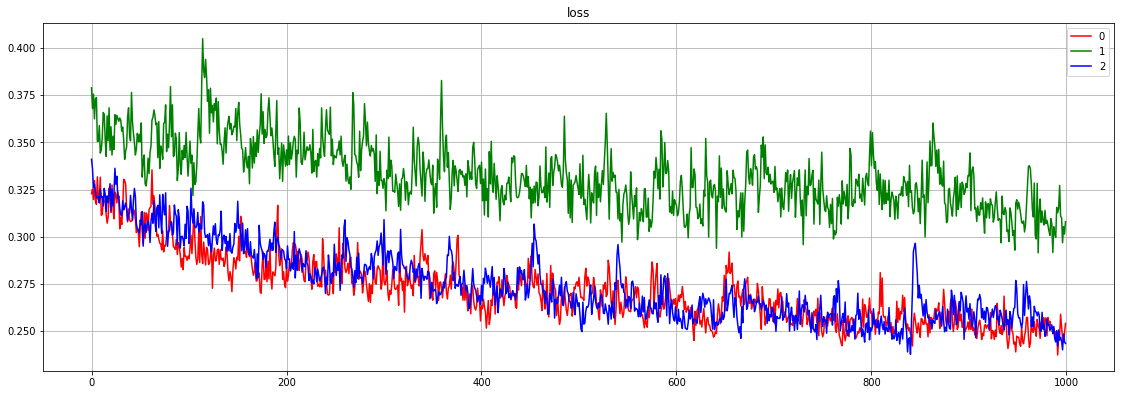

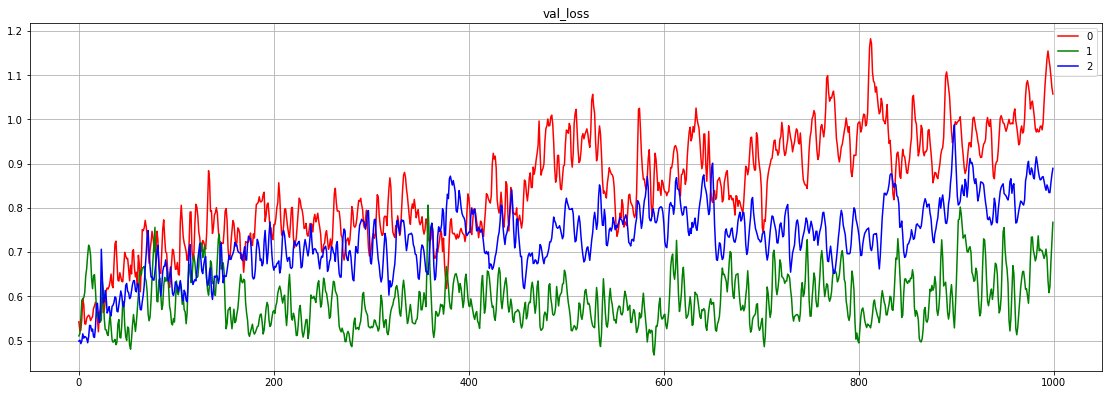

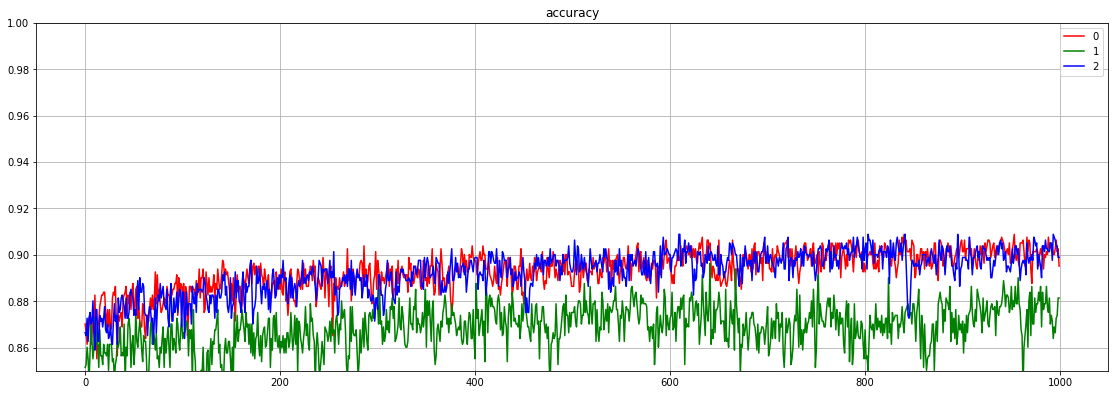

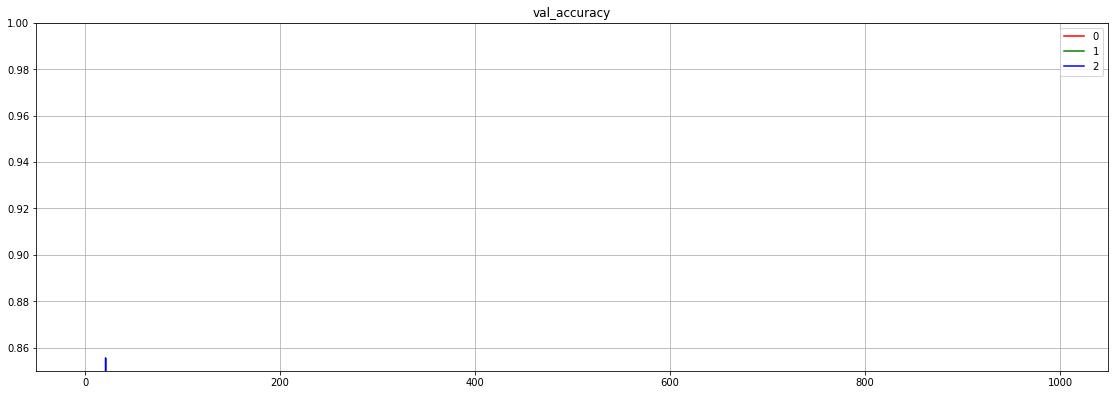

In [54]:
# 无量纲化结果
SCALED_PATH = os.path.join(CUR_PATH, FILE_NAME, get_scaled())
with open(SCALED_PATH, 'r') as f:
    results = json.load(f)

SCALED_histories = tuple(json.loads(model_test_result['history'].replace('\'', '"')) for model_test_result in results['model_test_results'])
plot_history(SCALED_histories)

# "num_layers": 7, "units_0": 16, "rate_0": 0.5, "units_1": 16, "rate_1": 0.0, "learning_rate": 0.01, "units_2": 256, "rate_2": 0.0, "units_3": 256, "rate_3": 0.5, "units_4": 80, "rate_4": 0.1, "units_5": 208, "rate_5": 0.15000000000000002, "units_6": 48, "rate_6": 0.35000000000000003, "units_7": 144, "rate_7": 0.05, "units_8": 256, "rate_8": 0.5, "units_9": 176, "rate_9": 0.25

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

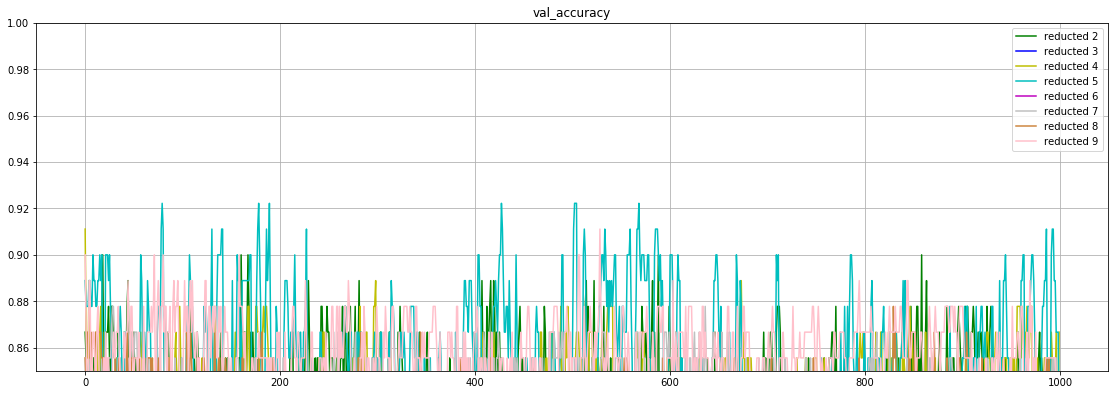

In [57]:
# 特征降维结果
plot_multi_histories(get_reducted, 2, 9)

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

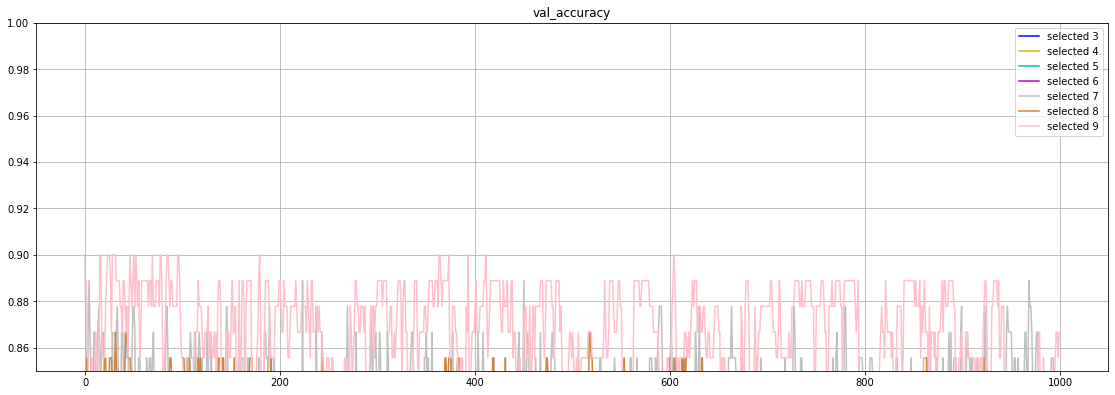

In [58]:
# 特征选择结果
plot_multi_histories(get_selected, 3, 9)

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

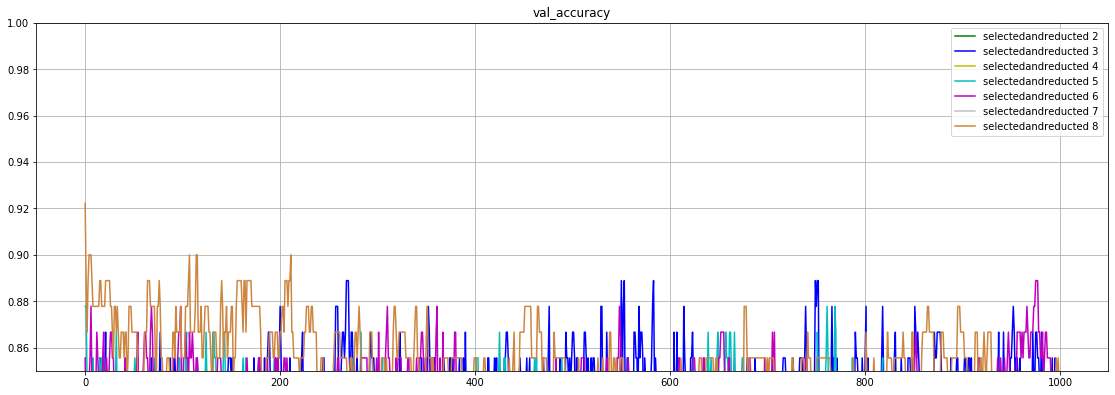

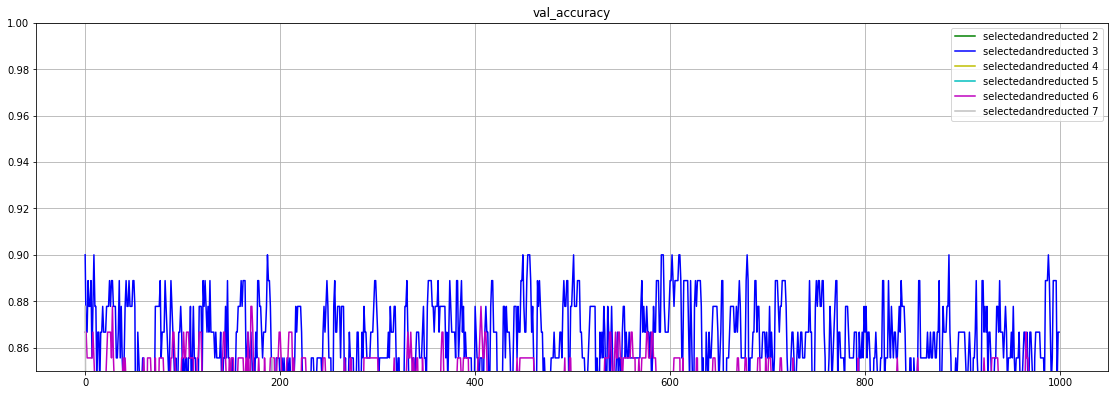

In [59]:
# 特征选择、降维结果
plot_multi_histories(get_selectedandreducted, 2, 8, 9)
plot_multi_histories(get_selectedandreducted, 2, 7, 8)

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [16]:
# # 最佳结果
# BEST_PATH = os.path.join(CUR_PATH, FILE_NAME, get_reducted(9))
# with open(BEST_PATH, 'r') as f:
#     results = json.load(f)

# best_history = tuple(json.loads(model_test_result['history'].replace('\'', '"')) for model_test_result in results['model_test_results'])[0]

# val_accuracy = best_history['val_accuracy']
# best_val_accuracy = max(val_accuracy)
# best_epoch = val_accuracy.index(best_val_accuracy)
# print(best_epoch, best_val_accuracy)

In [15]:
# # 最佳结果
# BEST_PATH = os.path.join(CUR_PATH, FILE_NAME, get_reducted(8))
# with open(BEST_PATH, 'r') as f:
#     results = json.load(f)

# best_history = tuple(json.loads(model_test_result['history'].replace('\'', '"')) for model_test_result in results['model_test_results'])[0]

# val_accuracy = best_history['val_accuracy']
# best_val_accuracy = max(val_accuracy)
# best_epoch = val_accuracy.index(best_val_accuracy)
# print(best_epoch, best_val_accuracy)